## Comparing Housing Market "Hotness": Dallas vs Austin

In [109]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress 

In [110]:
#Create dataframe to analyze days on market

dom_df= pd.read_csv("fakedata.csv")
dom_df.head(5)

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,2/1/2012,190,5.60%,2.20%,1403,18.60%,16.60%,2569,...,10.40%,6941,1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,3/1/2012,200,5.10%,8.70%,2076,48.00%,18.60%,3400,...,-3.00%,7394,6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,4/1/2012,205,2.70%,7.90%,2120,2.10%,14.80%,3379,...,1.40%,7698,4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,5/1/2012,210,2.40%,9.10%,2584,21.90%,25.10%,3493,...,11.80%,7908,2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,6/1/2012,214,2.00%,8.70%,2842,10.00%,21.00%,3396,...,8.80%,8152,3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%


In [111]:
#Validate number of unique records for each city (Verification purposes only)
dom_df["Month of Period End"].value_counts().unique()

array([2], dtype=int64)

In [112]:
#print columns of the dataframe
dom_df.dtypes

City                         object
State                        object
Month of Period End          object
Median Sale Price             int64
Median Sale Price MoM        object
Median Sale Price YoY        object
Homes Sold                    int64
Homes Sold MoM               object
Homes Sold YoY               object
New Listings                  int64
New Listings MoM             object
New Listings YoY             object
Inventory                     int64
Inventory MoM                object
 Inventory YoY               object
Days on Market                int64
Days on Market MoM            int64
Days on Market YoY            int64
Average Sale To List         object
Average Sale To List MoM     object
Average Sale To List YoY     object
dtype: object

In [113]:
# Data cleaning
dom_df['Average Sale To List'] = dom_df['Average Sale To List'].str.replace('%', '').astype('float')
dom_df['Month of Period End'] = pd.to_datetime(dom_df['Month of Period End'], infer_datetime_format=True)

# Data Augmentation
dom_df['yr_start'] = dom_df['Month of Period End'].dt.month == 1
dom_df.dtypes

City                                 object
State                                object
Month of Period End          datetime64[ns]
Median Sale Price                     int64
Median Sale Price MoM                object
Median Sale Price YoY                object
Homes Sold                            int64
Homes Sold MoM                       object
Homes Sold YoY                       object
New Listings                          int64
New Listings MoM                     object
New Listings YoY                     object
Inventory                             int64
Inventory MoM                        object
 Inventory YoY                       object
Days on Market                        int64
Days on Market MoM                    int64
Days on Market YoY                    int64
Average Sale To List                float64
Average Sale To List MoM             object
Average Sale To List YoY             object
yr_start                               bool
dtype: object

In [114]:
dom_df.head(5)

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,yr_start
0,Austin,Texas,2012-02-01,190,5.60%,2.20%,1403,18.60%,16.60%,2569,...,6941,1.20%,-21.50%,74,0,-18,96.7,0.40%,0.10%,False
1,Austin,Texas,2012-03-01,200,5.10%,8.70%,2076,48.00%,18.60%,3400,...,7394,6.50%,-23.10%,58,-16,-26,97.3,0.60%,0.90%,False
2,Austin,Texas,2012-04-01,205,2.70%,7.90%,2120,2.10%,14.80%,3379,...,7698,4.10%,-24.00%,39,-19,-21,97.7,0.40%,1.00%,False
3,Austin,Texas,2012-05-01,210,2.40%,9.10%,2584,21.90%,25.10%,3493,...,7908,2.70%,-22.50%,36,-3,-18,97.6,0.00%,1.00%,False
4,Austin,Texas,2012-06-01,214,2.00%,8.70%,2842,10.00%,21.00%,3396,...,8152,3.10%,-20.30%,31,-5,-21,97.8,0.20%,1.10%,False


In [115]:
Austin_data = dom_df.loc[dom_df['City']=="Austin"]
Dallas_data = dom_df.loc[dom_df['City']=="Dallas"]

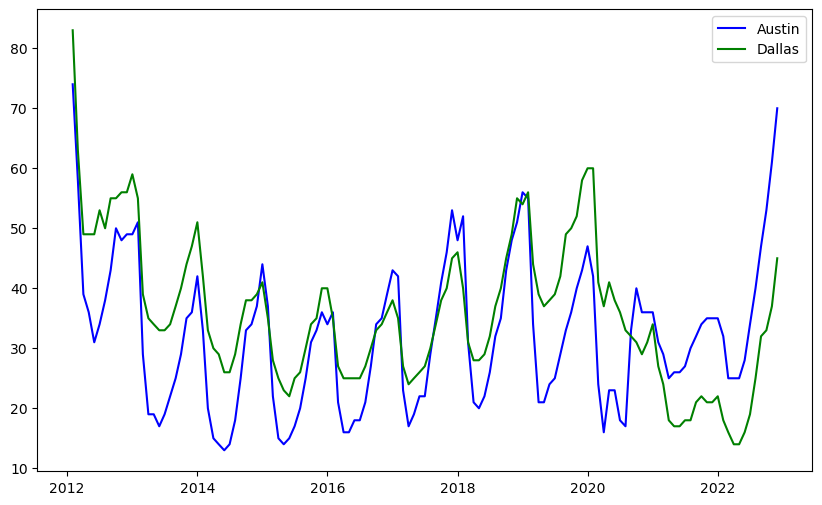

In [116]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.plot(Austin_data["Month of Period End"], 
                   Austin_data["Days on Market"], color='blue', label='Austin')
graph_axes.plot(Dallas_data["Month of Period End"], 
                   Dallas_data["Days on Market"], color='green', label='Dallas')

plt.legend()
plt.show()

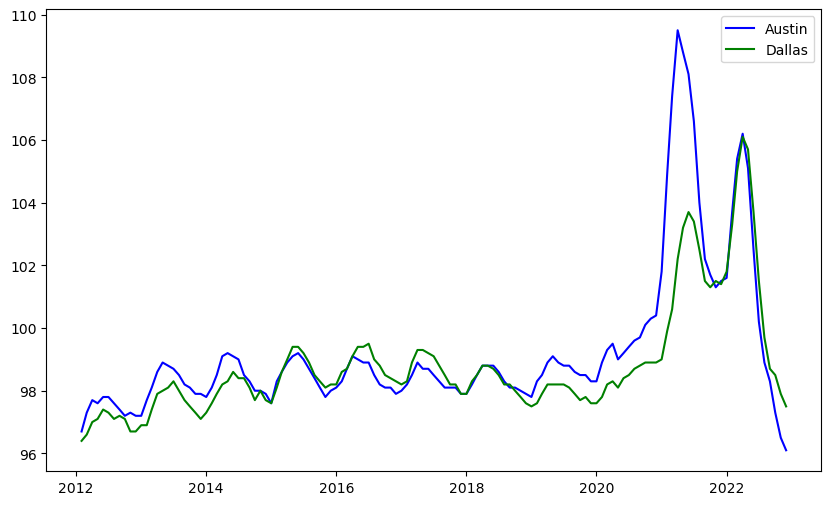

In [117]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.plot(Austin_data["Month of Period End"], 
                   Austin_data["Average Sale To List"], color='blue', label='Austin')
graph_axes.plot(Dallas_data["Month of Period End"], 
                   Dallas_data["Average Sale To List"], color='green', label='Dallas')

plt.legend()
plt.show()

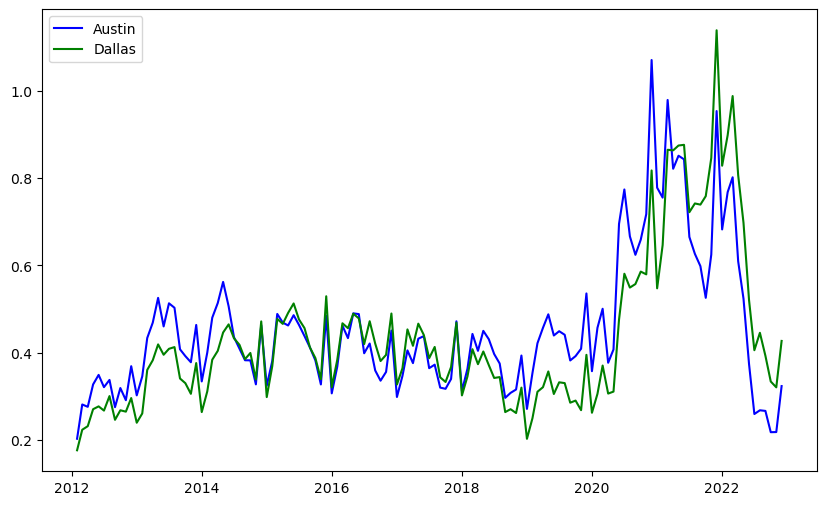

In [119]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.plot(Austin_data["Month of Period End"], 
                   Austin_data["Homes Sold"] / Austin_data["Inventory"], 
                   color='blue', 
                   label='Austin')
graph_axes.plot(Dallas_data["Month of Period End"], 
                   Dallas_data["Homes Sold"]/Dallas_data["Inventory"], 
                   color='green', 
                   label='Dallas')
# graph_axes.vlines(x=dom_df[dom_df['yr_start']]['Month of Period End'], 
#            ymin=0.2,
#            ymax=1.15,
#            colors='red',
#            linestyles='dashed')

plt.legend()
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()